<a href="https://colab.research.google.com/github/neuralsrg/EDA/blob/main/learning_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration with Pandas

In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats
import matplotlib.pyplot as plt

## Download data

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv'

In [ ]:
! wget -P /data $URL

In [5]:
housing = pd.read_csv('/data/Ames_Housing_Data1.tsv', sep='\t')
housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


## Check NA

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

We want to prepare dataset to predict `SalePrice`

In [7]:
housing['SalePrice'].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Reveal information about categorical (object) attributes

In [9]:
housing['Sale Condition'].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

## Looking for correlations

Lets check which features correlate with `SalePrice`

In [12]:
housing_num = housing.select_dtypes(['int64', 'float64'])
correlation_matrix = housing_num.corr()
price_corrs = correlation_matrix.iloc[-1].drop(['SalePrice'])
price_corrs

Order             -0.031644
PID               -0.246617
MS SubClass       -0.085206
Lot Frontage       0.357141
Lot Area           0.266600
Overall Qual       0.799226
Overall Cond      -0.101763
Year Built         0.558340
Year Remod/Add     0.532664
Mas Vnr Area       0.508277
BsmtFin SF 1       0.432950
BsmtFin SF 2       0.005848
Bsmt Unf SF        0.182808
Total Bsmt SF      0.632270
1st Flr SF         0.621672
2nd Flr SF         0.269222
Low Qual Fin SF   -0.037673
Gr Liv Area        0.706791
Bsmt Full Bath     0.276144
Bsmt Half Bath    -0.035870
Full Bath          0.545339
Half Bath          0.284909
Bedroom AbvGr      0.143934
Kitchen AbvGr     -0.119839
TotRms AbvGrd      0.495500
Fireplaces         0.474481
Garage Yr Blt      0.526808
Garage Cars        0.647891
Garage Area        0.640411
Wood Deck SF       0.327220
Open Porch SF      0.312970
Enclosed Porch    -0.128833
3Ssn Porch         0.032209
Screen Porch       0.112104
Pool Area          0.068392
Misc Val          -0

In [13]:
top_features = price_corrs[abs(price_corrs) > 0.5].sort_values(ascending=False)
top_features

Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

### Visualize correlations

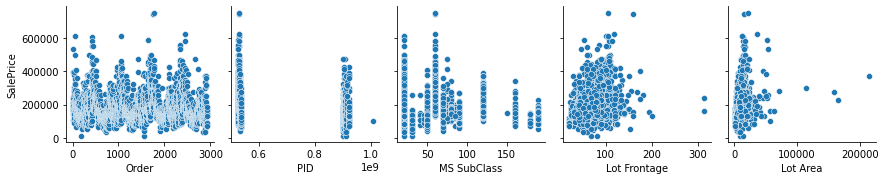

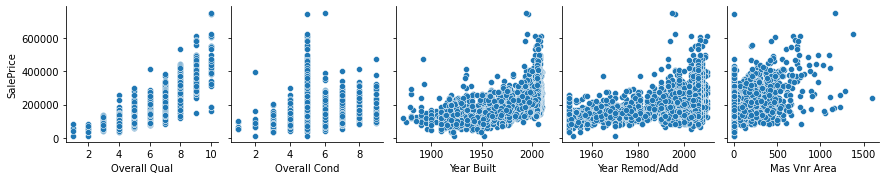

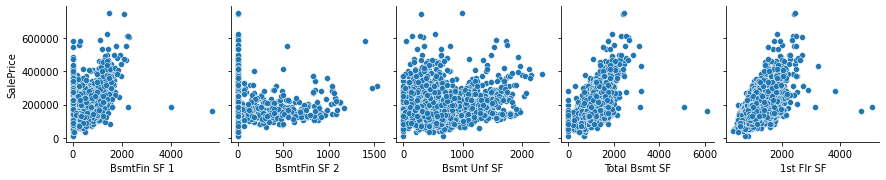

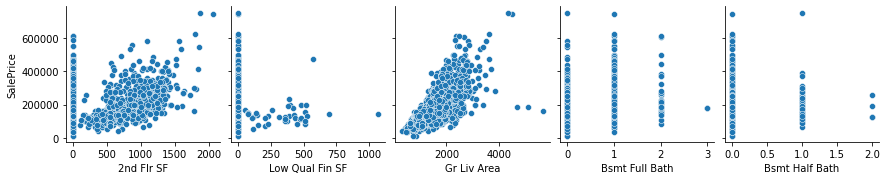

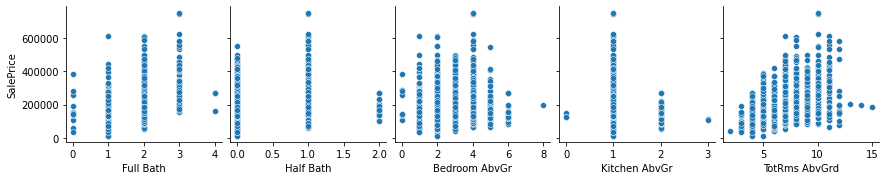

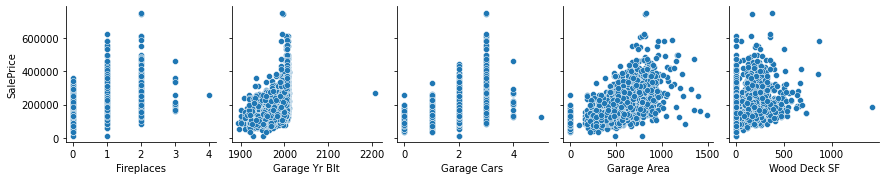

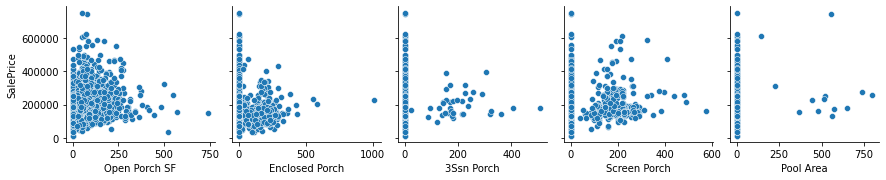

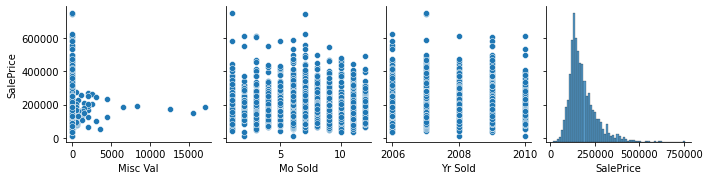

In [16]:
for i in range(0, len(housing_num.columns), 5):
  sns.pairplot(data=housing_num,
               x_vars=housing_num.columns[i:i+5],
               y_vars=['SalePrice'])

## SalePrice distribution

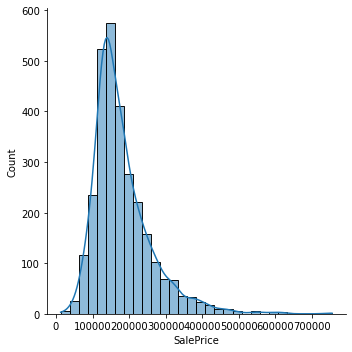

In [21]:
sns.displot(housing['SalePrice'], kde=True, bins=30)

In statistics `skewness` is a measure of asymmetry of the distribution. In addition to skewness, there is also a `kurtosis`, parameter which refers to the pointedness of a peak in the distribution curve.
As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew.

In [22]:
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.743222


In [89]:
housing['SalePrice'].kurtosis()

5.119642958196132

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0

## Reducing skewness

### Log transform

We can apply log transform to make our data more normal

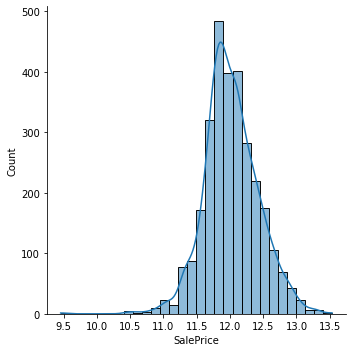

In [23]:
transformed = np.log(housing['SalePrice'])
sns.displot(transformed, kde=True, bins=30)

In [24]:
transformed.skew()

-0.015353828434352058

### Square root

0.8842810822621234


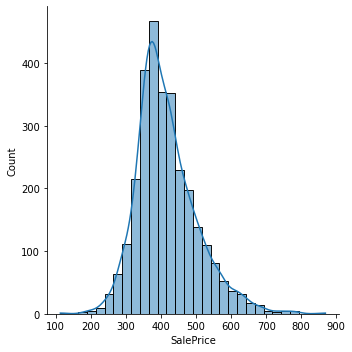

In [31]:
transformed = np.sqrt(housing['SalePrice'])
print(transformed.skew())
sns.displot(transformed, kde=True, bins=30)

### Boxcox

0.0015962451674062764 0.007934767586941395


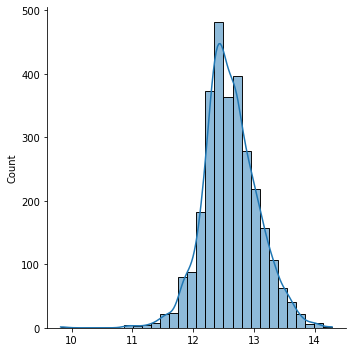

In [30]:
transformed, labmd = scipy.stats.boxcox(housing['SalePrice'])
print(pd.Series(transformed).skew(), labmd)
sns.displot(transformed, kde=True, bins=30)

## Duplicates

In [34]:
housing[housing.duplicated(['PID'])]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [38]:
# other way to check duplicates
housing.PID.is_unique

False

There is one duplicated row...

In [39]:
# remove duplicated row:
cleaned = housing.drop_duplicates(['PID'])

# other way to check duplicates
cleaned.PID.is_unique

True

## Missing values

Text(0.5, 1.0, 'Total Missing Values')

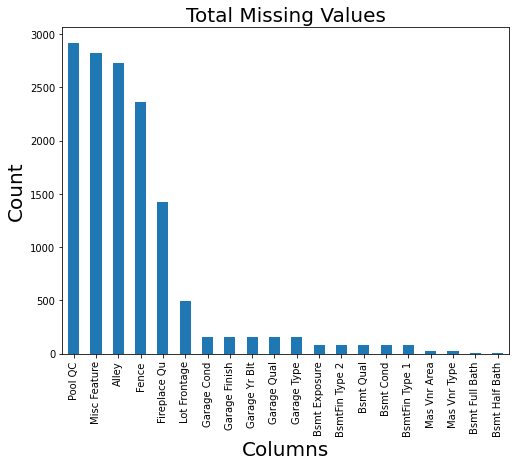

In [43]:
total = housing.isnull().sum().sort_values(ascending=False)

total.head(20).plot(kind="bar", figsize=(8,6), fontsize=10)
plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Total Missing Values", fontsize=20)

### dropna


In [ ]:
housing = housing.dropna(['Fence']) # drops all rows with NA in Fence column

### fillna

In [45]:
housing['Lot Frontage'].fillna(housing['Lot Frontage'].median(), inplace=True)
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


## Feature scaling

In [47]:
# min-max scaling
# [data - data.min()] / [data.max() - data.min()] --> [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform(housing_num)
scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

In [48]:
# standartization
# [data - data.mean()] / data.std()
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(housing_num)
scaled

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

## Outliers handling

### Uni-variate Analysis

##### Vizualization with boxplot

![image](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

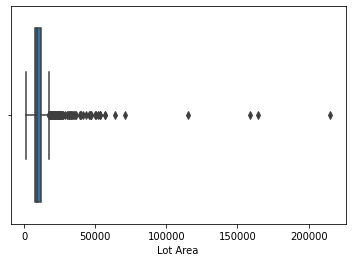

In [62]:
sns.boxplot(x=housing['Lot Area'])

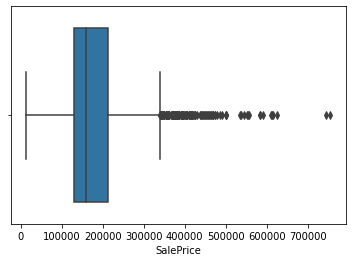

In [63]:
sns.boxplot(x=housing['SalePrice'])

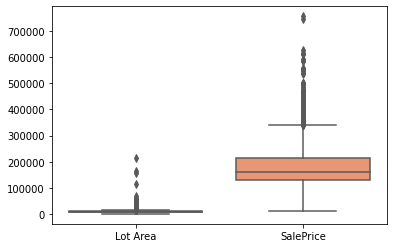

In [70]:
sns.boxplot(data=housing[['Lot Area', 'SalePrice']], orient="v", palette="Set2")

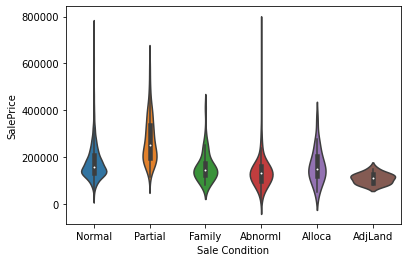

In [74]:
sns.violinplot(data=housing, x='Sale Condition', y='SalePrice')

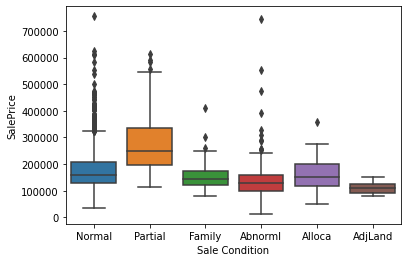

In [75]:
sns.boxplot(data=housing, x='Sale Condition', y='SalePrice')

### Bi-variate Analysis

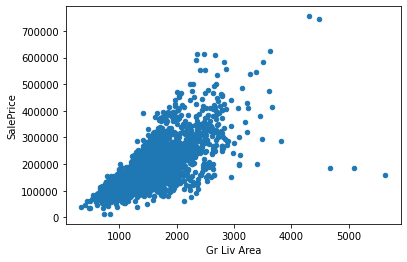

In [76]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                                  y='SalePrice')

### Z-score Analysis

In [82]:
housing['LQFSF_Stats'] = scipy.stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2931.000,2931.000
mean,4.675,-0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882


$Value = mean + ZScore * std$

(It shows the deviation from mean divided by std) 

In [87]:
housing.sort_values(by=['Low Qual Fin SF'], ascending=False)[['Low Qual Fin SF', 'LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2931.000,2931.000
mean,4.675,0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882


In [88]:
housing.sort_values(by=['Low Qual Fin SF'], ascending=False)[['Low Qual Fin SF', 'LQFSF_Stats']][:2]

,Low Qual Fin SF,LQFSF_Stats
661,1064,22.882161
1362,697,14.954703


$$
P(|X| \ge a) \le \frac{E|X|}{a}
$$

$$
P(|X - E(X)| \ge \epsilon) ≤ \frac{Var(X)}{\epsilon ^2}
$$

$$
P(|X - EX| < 3 \sigma) ≥ \frac{8}{9} (\approx 90\%)
$$

Hence, we can delete every row where Z-Score of some feature is: Z-Score > |3*std|:


## Deleting outliers

In [80]:
housing.sort_values(by=['Gr Liv Area'], ascending=False)[:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [ ]:
housing.drop(housing.index[[1499, 2181]])